In [2]:
import numpy as np
from numpy import log, sum
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def addOnes(X):    
    m = X.shape[0]
    ones = np.ones(m)
    onesX = np.column_stack((ones, X))
    return onesX

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def sigmoidGradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_lables, X, y, lambda_):
    theta1 = nn_params[:(input_layer_size + 1) * hidden_layer_size].reshpe(hidden_layer_size, (input_layer_size + 1))
    theta2 = nn_params[(input_layer_size + 1) * hidden_layer_size:].reshpe(num_lables, (hidden_layer_size + 1))
    m = X.shape[0]
    J = 0
    
    a1 = addOnes(X)
    z2 = a1 @ theta1.T
    a2 = sigmoid(z2)
    z3 = a2 @ theta2.T
    a3 = sigmoid(z3)
    h_X = a3
    
    yVec = np.zeros((m, num_lables))
    for i in range(m):
        yVec[i, y[i]] = 1
    
    J =  (1.0/m) * sum(sum (-1 * yVec * log(h_X)  - (1 - yVec) * log(1-h_X)))
    regularator = (lambda_/(2.0*m)) * (sum(sum(theta1[:,1:] ** 2)) + sum(sum(Theta2[:,1:] ** 2))) ;
    J += regularator

    delta_3 = a3 - yVec
    delta_2 = (theta2.T @ delta_3) * sigmoidGradient(z2)
        
               

In [5]:
sigmoid(0)

0.5

In [6]:
sigmoidGradient(np.array([-1,0,1]))

array([ 0.19661193,  0.25      ,  0.19661193])

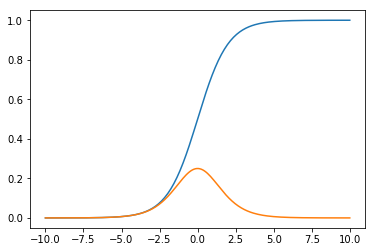

In [7]:
x_lin = np.linspace(-10,10,200)

plt.plot(x_lin, sigmoid(x_lin), x_lin, sigmoidGradient(x_lin))

In [8]:
class NN:
    
    def __init__(self, layers):
        self.weights = []
    # layers = [2,2,1]
        for i in range(1, len(layers)):
            r = 2*np.random.random((layers[i], layers[i - 1] + 1))
            self.weights.append(r)
        
    def fit(self, X, y, learning_rate=0.2, epochs=3000):
        X = addOnes(X)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            for l in range(len(self.weights)):
                dot_value = self.weights[l] @ (np.hstack((1, a)))
                activation = sigmoid(dot_value)
                a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * sigmoidGradient(a[-1])]
            
            for l in range(len(a) - 2, 0, -1):
                deltas.append(weights[l].T * sigmoidGradient(a[l]))
            

In [9]:
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    theta1 = 0.1 * np.random.random((n_hidden, n_inputs + 1))
    network.append(theta1)
    theta2 = 0.1 * np.random.random((n_outputs, n_hidden + 1))
    network.append(theta2)
    return network

def activate(weights, inputs):
    pass

def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for 
    

SyntaxError: invalid syntax (<ipython-input-9-09ae1a5e2d82>, line 16)

In [10]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))


class NeuralNetwork:

    def __init__(self, layers, weights=None):
        """
        layers = [2,2,1]
        """
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime
        if not weights:
            self.weights = []
        #self.weights = [np.array([[1, 0.1, 0.1],[1, 0.1, 0.1]]),
        #               np.array([[1, 0.1, 0.1],[1, 0.1, 0.1]])]
            for i in range(1, len(layers)):
                r = np.random.random((layers[i], layers[i - 1] + 1)) - 0.5
                self.weights.append(r)
        else:
            self.weights = weights
        print('weights', self.weights)

    def fit(self, X, y, learning_rate=0.5, epochs=3000):

         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
        
            for l in range(len(self.weights)):
                a_in = self.weights[l] @ np.insert(a[l],0,1)
                activation = self.activation(a_in)
                a.append(activation)
            #print('a', a)

            error = y[i] - a[-1]
            #print('error',error)
            outer_delta = self.activation_prime(a[-1]) * (-error)
            deltas = [outer_delta]
            for l in range(len(a) - 2, 0, -1):
               # print(a[l].shape)
               # print(self.weights[l].T.shape)
               # print(deltas[len(a) - 2 - l].shape)
                delta = np.insert(self.activation_prime(a[l]),0,1) * (self.weights[l].T @ deltas[len(a) - 2 - l])
                delta = delta[1:]
                deltas.append(delta)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas = np.flip(deltas, axis=0)
            #print('deltas', deltas)
            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            
            for i in range(len(self.weights)):
                layer = np.atleast_2d(np.insert(a[i],0,1))
                delta = np.atleast_2d(deltas[i])
                #print(layer.T.shape)
                #print(delta.shape)
                #print(self.weights[i].shape)
                self.weights[i] -= learning_rate * (delta.T @ layer)

            #print('weigts', self.weights)

    def predict(self, x): 
        a = x
        for l in range(0, len(self.weights)):
            a = np.insert(a, 0, 1)
            a = self.activation(self.weights[l] @ a)
        return a

In [16]:
nn = NeuralNetwork([2,1])
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0,0,0,1]).reshape((-1,1))

nn.fit(X, y,learning_rate=0.02,epochs=10000)

for i in range(len(X)):
    print(nn.predict(X[i]))

weights [array([[-0.47170372, -0.39499153,  0.25275224]])]
[ 0.03403878]
[ 0.20134578]
[ 0.2008464]
[ 0.64260903]


In [12]:
nn = NeuralNetwork([2,2,2])
X = np.array([[1,0]])
y = np.array([[0, 1]])

nn.fit(X, y,epochs=1)

weights [array([[-0.19517903,  0.30926319,  0.35154771],
       [-0.26391903,  0.19896394, -0.06243876]]), array([[ 0.01235975, -0.04505517,  0.18647049],
       [ 0.43150065,  0.27274992, -0.09220811]])]
